# BTLA and PD-1 signals attenuate TCR-mediated transcriptomic changes
GEO: [GSE239586](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE239586)

In [41]:
suppressPackageStartupMessages({
    library(R.utils)
    library(dplyr)
    library(ggplot2)
    library(reshape2)
    library(edgeR)
})

In [18]:
metadata <- data.table::fread("https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE239586&format=file&file=GSE239586%5Fmetadata%2Etxt%2Egz")
head(metadata)

sample,type,Group
<chr>,<chr>,<chr>
S_1,unstimulated,0
S_2,unstimulated,0
S_3,unstimulated,0
S_4,TCR,4h
S_5,TCR,4h
S_6,TCR,4h


In [32]:
data <- data.table::fread(
    "https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE239586&format=file&file=GSE239586%5Fraw%5Fcounts%2Etxt%2Egz"
    ) %>% select(-ENSEMBL)
rownames(data) <- make.unique(data[[1]])
counts <- data.frame(data[,-1], row.names = make.unique(data[[1]]))
head(counts)

,S_4,S_3,S_10,S_11,S_7,S_12,S_9,S_2,S_15,S_6,⋯,S_21,S_17,S_18,S_19,S_24,S_25,S_29,S_16,S_28,S_23
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
TSPAN6,4,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
TNMD,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
DPM1,2043,3426,1763,1957,1975,1871,2223,2838,1965,1974,⋯,1765,1780,1897,1826,1509,1185,1237,1759,1232,1530
SCYL3,1093,1443,875,1007,1156,1121,1153,1574,695,1076,⋯,574,655,518,605,612,503,504,634,507,629
C1orf112,2303,3267,2043,2143,2330,2204,2650,3287,2224,2216,⋯,1986,1856,1914,1917,1455,1383,1272,2126,1426,1746
FGR,244,291,235,260,259,306,213,314,67,225,⋯,101,92,80,62,67,45,77,76,46,68


In [37]:
# Create a box plot
counts_mat <- as.matrix(counts)
box_plot <- ggplot(data = melt(counts_mat), aes(x = Var2, y = value)) +
  geom_boxplot() +
  labs(x = "Samples", y = "Counts") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) +
  ggtitle("Box Plot of Counts Matrix")

# Compute summary statistics
summary_stats <- apply(counts_mat, 2, summary)
formatted_summary <- t(round(summary_stats, 2)) 

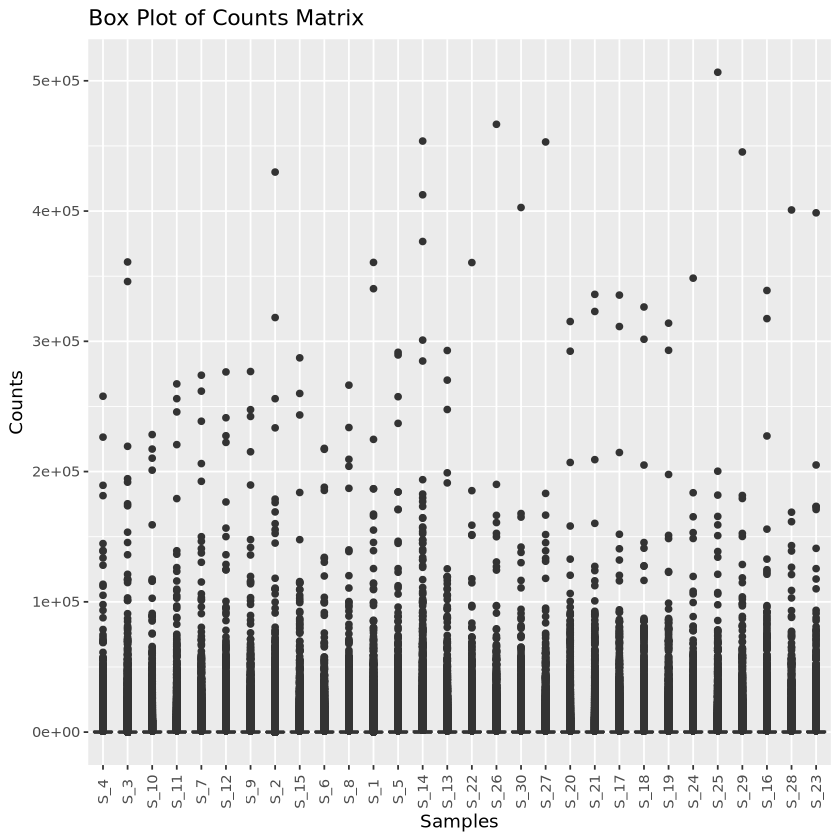

In [38]:
box_plot

In [39]:
print(knitr::kable(formatted_summary, caption = "Summary Statistics", align = "c"))



Table: Summary Statistics

|     | Min. | 1st Qu. | Median |  Mean   | 3rd Qu. |  Max.  |
|:----|:----:|:-------:|:------:|:-------:|:-------:|:------:|
|S_4  |  0   |    0    |   0    | 829.33  | 376.25  | 257830 |
|S_3  |  0   |    0    |   0    | 849.99  |  4.00   | 360914 |
|S_10 |  0   |    0    |   0    | 833.52  | 402.25  | 228405 |
|S_11 |  0   |    0    |   0    | 953.94  | 466.00  | 267309 |
|S_7  |  0   |    0    |   0    | 928.53  | 432.00  | 273981 |
|S_12 |  0   |    0    |   0    | 917.25  | 446.00  | 276486 |
|S_9  |  0   |    0    |   0    | 945.35  | 444.00  | 276811 |
|S_2  |  0   |    0    |   0    | 837.31  |  4.00   | 429927 |
|S_15 |  0   |    0    |   0    | 949.09  | 407.25  | 287307 |
|S_6  |  0   |    0    |   0    | 797.56  | 359.00  | 217813 |
|S_8  |  0   |    0    |   1    | 919.13  | 425.00  | 266353 |
|S_1  |  0   |    0    |   0    | 853.28  |  4.00   | 360572 |
|S_5  |  0   |    0    |   0    | 1028.31 | 471.00  | 291574 |
|S_14 |  0   |    0    |  

## Normalize Data

In [44]:
dgeFull1 = DGEList(counts = counts, group = metadata$type)
dim(dgeFull1)

[1] 68884    30

In [45]:
dgeFull1 <- calcNormFactors(dgeFull1, method="TMM")
head(dgeFull1$samples)

,group,lib.size,norm.factors
,<fct>,<dbl>,<dbl>
S_4,unstimulated,57127244,1.0254349
S_3,unstimulated,58551019,1.8678209
S_10,unstimulated,57416416,0.9194579
S_11,TCR,65711066,0.9233480
S_7,TCR,63960932,0.9575919
S_12,TCR,63184176,0.9324236


In [46]:
eff.lib.size0 <- dgeFull1$samples$lib.size*dgeFull1$samples$norm.factors
analysis <- data.frame(cpm(dgeFull1))
colnames(analysis) <- sub(pattern = "^X", replacement = "", colnames(analysis))
analysis <-as.matrix(analysis)
head(analysis)

,S_4,S_3,S_10,S_11,S_7,S_12,S_9,S_2,S_15,S_6,⋯,S_21,S_17,S_18,S_19,S_24,S_25,S_29,S_16,S_28,S_23
TSPAN6,0.06828238,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,⋯,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000000,0.000000,0.000000,0.0000000,0.000000
TNMD,0.00000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,⋯,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000000,0.000000,0.000000,0.0000000,0.000000
DPM1,34.87522438,31.326918,33.395225,32.254245,32.245704,31.757932,35.598923,25.893460,33.311979,34.929734,⋯,31.700211,33.231620,35.958172,34.287919,28.023614,19.6138490,21.240604,31.136265,21.5392229,24.803436
SCYL3,18.65815969,13.194613,16.574488,16.596845,18.873941,19.027601,18.464039,14.360925,11.782099,19.039713,⋯,10.309304,12.228489,9.818837,11.360455,11.365442,8.3255410,8.654215,11.222508,8.8639497,10.196968
C1orf112,39.31357893,29.873042,38.699061,35.319799,38.041767,37.410199,42.436863,29.990064,37.702718,39.211900,⋯,35.669472,34.650498,36.280412,35.996682,27.020781,22.8910997,21.841591,37.632574,24.9309512,28.305098
FGR,4.16522504,2.660868,4.451434,4.285183,4.228677,5.193975,3.410963,2.864886,1.135828,3.981353,⋯,1.814006,1.717589,1.516423,1.164212,1.244256,0.7448297,1.322172,1.345285,0.8042242,1.102375


## View normalized data

In [47]:
# Create a box plot
counts_mat <- analysis
box_plot <- ggplot(data = melt(counts_mat), aes(x = Var2, y = value)) +
  geom_boxplot() +
  labs(x = "Samples", y = "Counts") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + # Rotate x-axis labels for better readability
  ggtitle("Box Plot of Counts Matrix")

# Compute summary statistics
summary_stats <- apply(counts_mat, 2, summary)
formatted_summary <- t(round(summary_stats, 2)) 

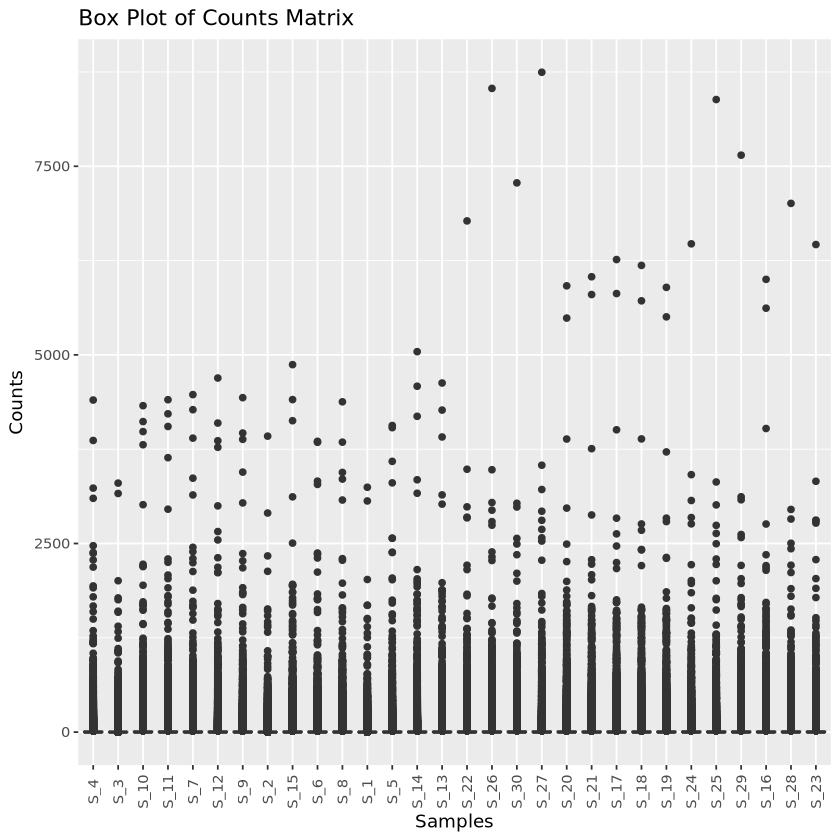

In [48]:
box_plot

In [49]:
print("Summary Statistics:")
print(knitr::kable(formatted_summary, caption = "Summary Statistics", align = "c"))

[1] "Summary Statistics:"


Table: Summary Statistics

|     | Min. | 1st Qu. | Median | Mean  | 3rd Qu. |  Max.   |
|:----|:----:|:-------:|:------:|:-----:|:-------:|:-------:|
|S_4  |  0   |    0    |  0.00  | 14.16 |  6.42   | 4401.31 |
|S_3  |  0   |    0    |  0.00  | 7.77  |  0.04   | 3300.15 |
|S_10 |  0   |    0    |  0.00  | 15.79 |  7.62   | 4326.51 |
|S_11 |  0   |    0    |  0.00  | 15.72 |  7.68   | 4405.65 |
|S_7  |  0   |    0    |  0.00  | 15.16 |  7.05   | 4473.27 |
|S_12 |  0   |    0    |  0.00  | 15.57 |  7.57   | 4693.01 |
|S_9  |  0   |    0    |  0.00  | 15.14 |  7.11   | 4432.83 |
|S_2  |  0   |    0    |  0.00  | 7.64  |  0.04   | 3922.59 |
|S_15 |  0   |    0    |  0.00  | 16.09 |  6.90   | 4870.62 |
|S_6  |  0   |    0    |  0.00  | 14.11 |  6.35   | 3854.18 |
|S_8  |  0   |    0    |  0.02  | 15.11 |  6.99   | 4377.80 |
|S_1  |  0   |    0    |  0.00  | 7.68  |  0.04   | 3245.26 |
|S_5  |  0   |    0    |  0.00  | 14.33 |  6.56   | 4063.75 |
|S_14 |  0   | 

In [56]:
head(analysis)

,S_4,S_3,S_10,S_11,S_7,S_12,S_9,S_2,S_15,S_6,⋯,S_21,S_17,S_18,S_19,S_24,S_25,S_29,S_16,S_28,S_23
TSPAN6,0.06828238,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,⋯,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000000,0.000000,0.000000,0.0000000,0.000000
TNMD,0.00000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,⋯,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000000,0.000000,0.000000,0.0000000,0.000000
DPM1,34.87522438,31.326918,33.395225,32.254245,32.245704,31.757932,35.598923,25.893460,33.311979,34.929734,⋯,31.700211,33.231620,35.958172,34.287919,28.023614,19.6138490,21.240604,31.136265,21.5392229,24.803436
SCYL3,18.65815969,13.194613,16.574488,16.596845,18.873941,19.027601,18.464039,14.360925,11.782099,19.039713,⋯,10.309304,12.228489,9.818837,11.360455,11.365442,8.3255410,8.654215,11.222508,8.8639497,10.196968
C1orf112,39.31357893,29.873042,38.699061,35.319799,38.041767,37.410199,42.436863,29.990064,37.702718,39.211900,⋯,35.669472,34.650498,36.280412,35.996682,27.020781,22.8910997,21.841591,37.632574,24.9309512,28.305098
FGR,4.16522504,2.660868,4.451434,4.285183,4.228677,5.193975,3.410963,2.864886,1.135828,3.981353,⋯,1.814006,1.717589,1.516423,1.164212,1.244256,0.7448297,1.322172,1.345285,0.8042242,1.102375


In [55]:
phen <- metadata %>%
    rename(
        Sample = sample,
        Condition = type,
        Time_Point = Group
        ) %>%
    select(Sample, Condition, Time_Point) %>%
    mutate(across(everything(), as.character))
# phen$Compare_All <- paste(phen$Condition, phen$Time_Point, phen$Cell_Type, sep = "_")
head(phen)

Sample,Condition,Time_Point
<chr>,<chr>,<chr>
S_1,unstimulated,0
S_2,unstimulated,0
S_3,unstimulated,0
S_4,TCR,4h
S_5,TCR,4h
S_6,TCR,4h


In [58]:
dir.create("Jurkat_RNAseq_GSE239586", showWarnings = FALSE)
saveRDS(analysis, file = file.path("Jurkat_RNAseq_GSE239586", "expression.rds"))
saveRDS(phen, file = file.path("Jurkat_RNAseq_GSE239586", "metadata.rds"))

In [75]:
 unique(phen$Time_Point)[-1]

[1] "4h"  "20h" "48h"

In [78]:
system("R -e \"shiny::runApp('Jurkat_RNAseq_GSE239586')\"")